In [103]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import os

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from    datetime                 import   datetime
from    pandas                   import   read_csv, Grouper, DataFrame, concat
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF

from   IPython.display                 import display
from   pylab                           import rcParams
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error


1. Read the data as an appropriate Time Series data and plot the data.


In [104]:
df_1 = pd.read_csv("Rose.csv", parse_dates = ['YearMonth'])

In [105]:
df_1.head()

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [106]:
df_1.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [107]:
df_1 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')
df_1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


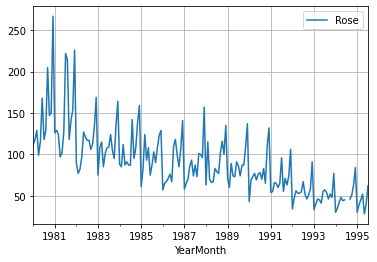

In [108]:
#Plot the time series
df_1.plot()
plt.grid()

In [109]:
df_1.isna().sum()

Rose    2
dtype: int64

In [110]:
df_1['1994'].tail()

,Rose
YearMonth,
1994-08-01,NaN
1994-09-01,46.0
1994-10-01,51.0
1994-11-01,63.0
1994-12-01,84.0


In [111]:
df_1 = df_1.replace(to_replace=np.NaN,value=84.0)

In [112]:
df_1.isna().sum()

Rose    0
dtype: int64

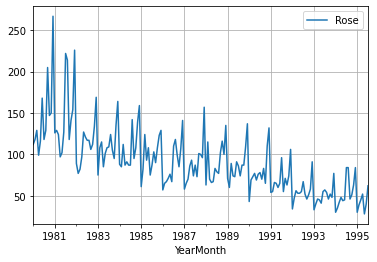

In [113]:
df_1.plot()
plt.grid()

2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [114]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [115]:
df_1.describe()

,Rose
count,187.000000
mean,90.326203
std,38.969736
min,28.000000
25%,63.000000
50%,85.000000
75%,111.000000
max,267.000000


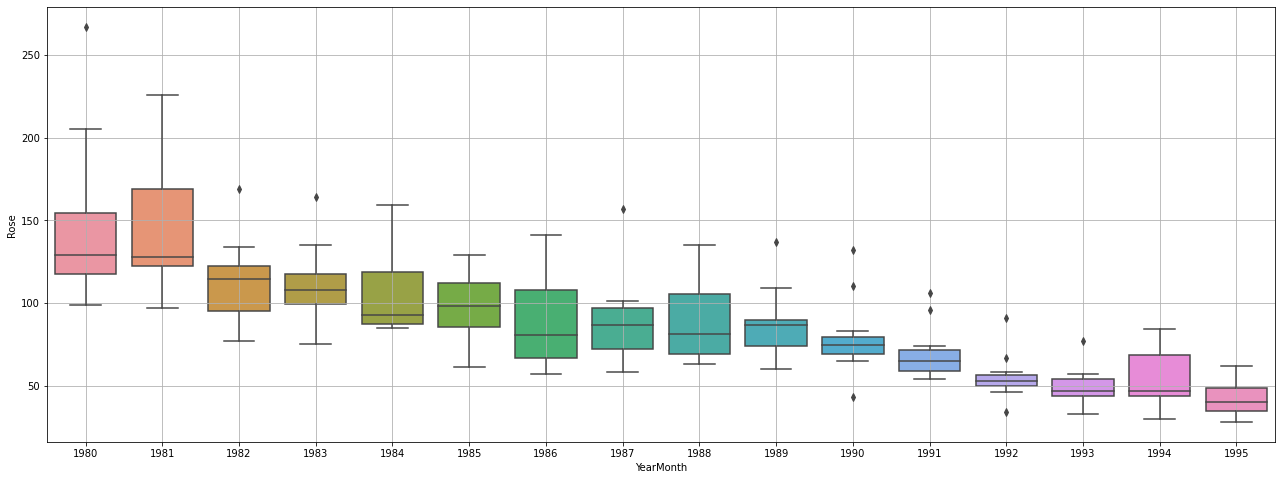

In [116]:
#Plot a year on year boxplot for the wine sales.
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.year,y = df_1['Rose'])
plt.grid();

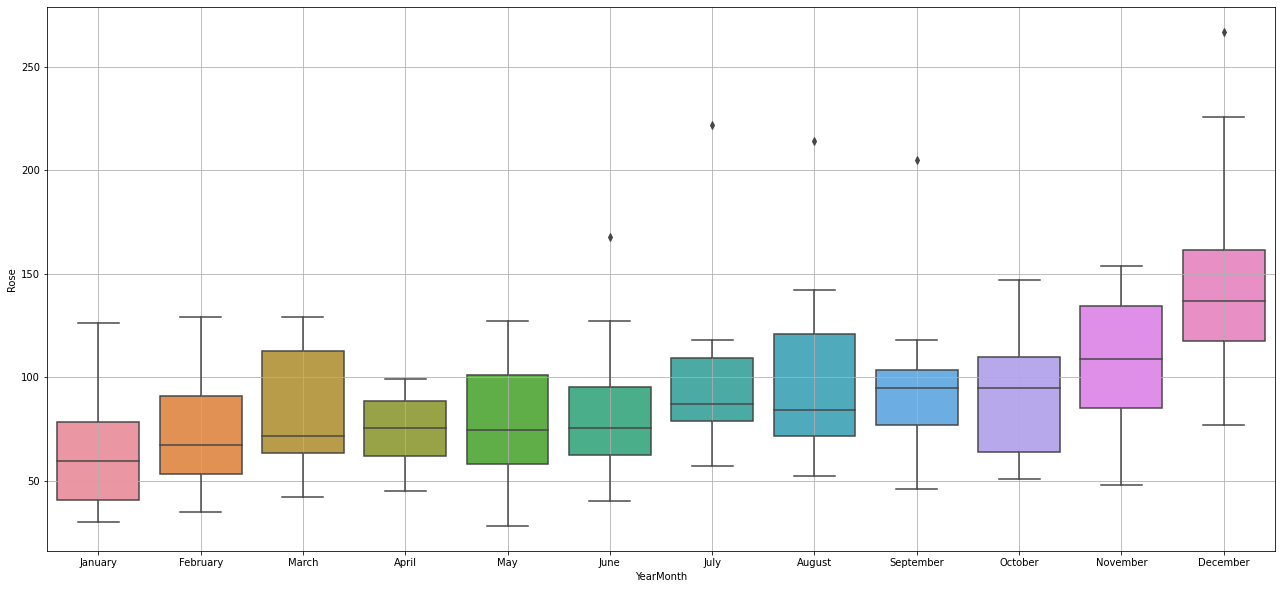

In [117]:
#Plot a monthly boxplot for the wine sales taking all the years into account.
fig, ax = plt.subplots(figsize=(22,10))

sns.boxplot(x = df_1.index.month_name(),y = df_1['Rose'])
plt.grid();

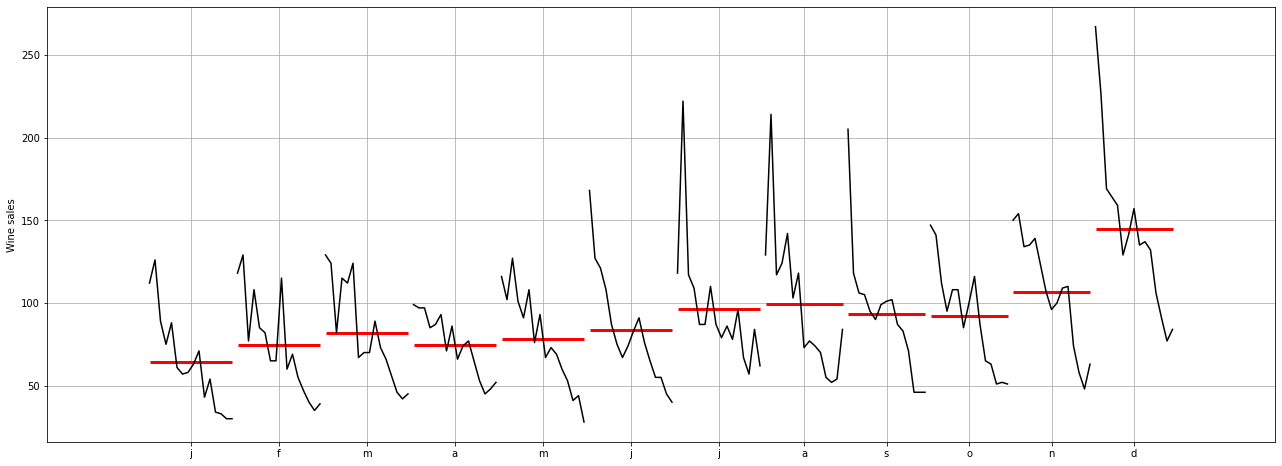

In [118]:
#Plot a monthplot of the give Time Series.

from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Wine sales',ax=ax)
plt.grid();

In [119]:
#Plot a graph of monthly RetailSales across years.

monthly_sales_across_years = pd.pivot_table(df_1, values = 'Rose', columns = df_1.index.month, index = df_1.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


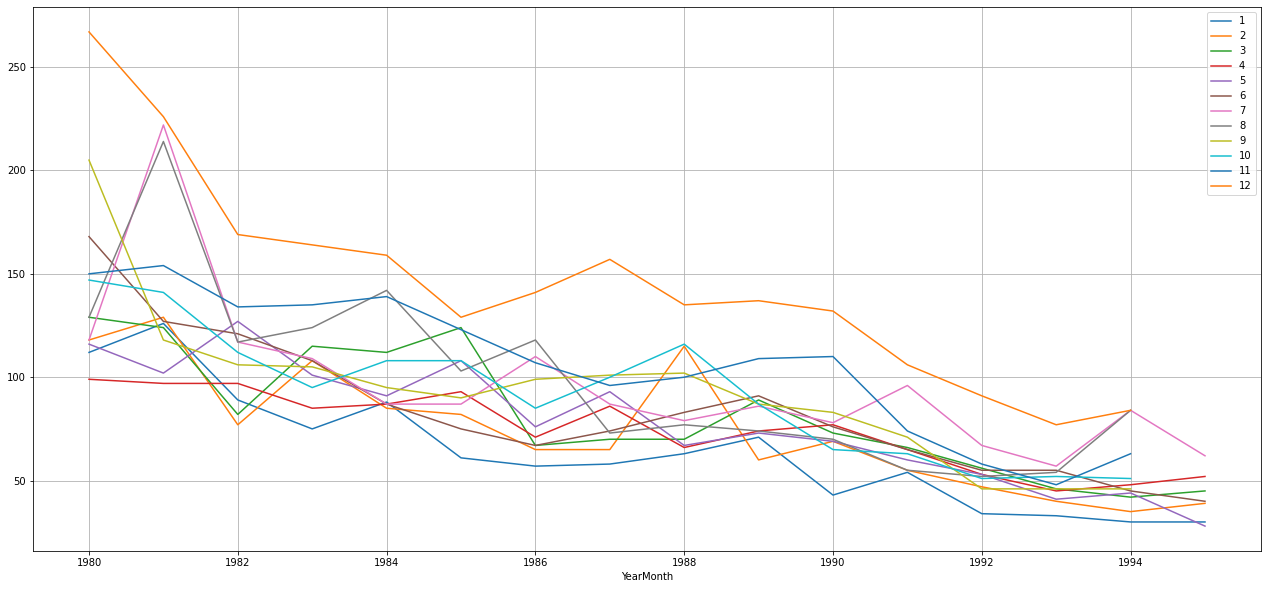

In [120]:
fig, ax = plt.subplots(figsize=(22,10))
monthly_sales_across_years.plot(ax=ax)
plt.grid()
plt.legend(loc='best');


In [121]:
#Decompose the Time Series and plot the different components.
from    statsmodels.tsa.seasonal import   seasonal_decompose

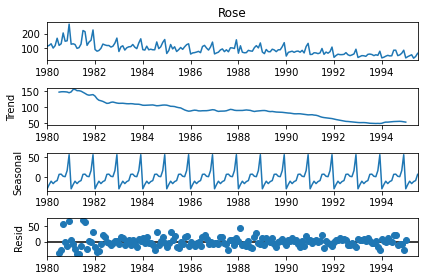

In [122]:
#Additive Decomposition

decomposition = seasonal_decompose(df_1['Rose'],model='additive')
decomposition.plot();

In [123]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [124]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.333201
1980-02-01   -17.776653
1980-03-01    -9.740939
1980-04-01   -15.553439
1980-05-01   -10.651653
1980-06-01    -8.133796
1980-07-01     7.050132
1980-08-01     7.630688
1980-09-01     2.350132
1980-10-01     1.447354
1980-11-01    16.422354
1980-12-01    55.289021
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -36.133466
1980-08-01   -26.755688
1980-09-01    54.274868
1980-10-01    -2.530688
1980-11-01   -13.839021
1980-12-01    66.58597

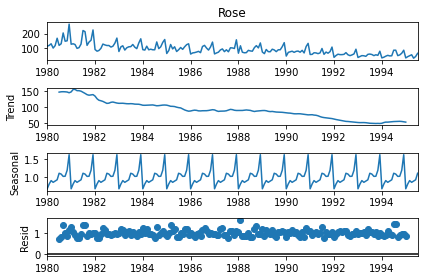

In [125]:
#Multiplicative Decomposition

decomposition = seasonal_decompose(df_1['Rose'],model='multiplicative')
decomposition.plot();

In [126]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.665141
1980-02-01    0.801398
1980-03-01    0.893577
1980-04-01    0.845291
1980-05-01    0.881629
1980-06-01    0.916318
1980-07-01    1.098157
1980-08-01    1.075439
1980-09-01    1.010587
1980-10-01    1.014807
1980-11-01    1.182543
1980-12-01    1.615111
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.730557
1980-08-01    0.809796
1980-09-01    1.367160
1980-10-01    0.978200
1980-11-01    0.860454
1980-12-01    1.139112
Name: resid, dtype: fl

3.Split the data into training and test. The test data should start in 1991.


In [127]:
train=df_1[df_1.index.year < 1991]
test=df_1[df_1.index.year >= 1991]

In [128]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.

In [129]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [130]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


In [131]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [132]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   134
1991-02-01  55.0   135
1991-03-01  66.0   136
1991-04-01  65.0   137
1991-05-01  60.0   138 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   184
1995-04-01  52.0   185
1995-05-01  28.0   186
1995-06-01  40.0   187
1995-07-01  62.0   188 



In [133]:
lr = LinearRegression()

In [134]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

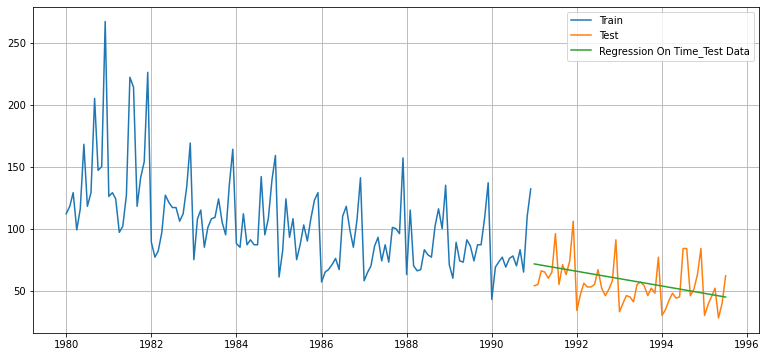

In [135]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [136]:
## Test Data - RMSE
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.380


In [137]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,16.380281


In [138]:
#Naive Approach
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [139]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

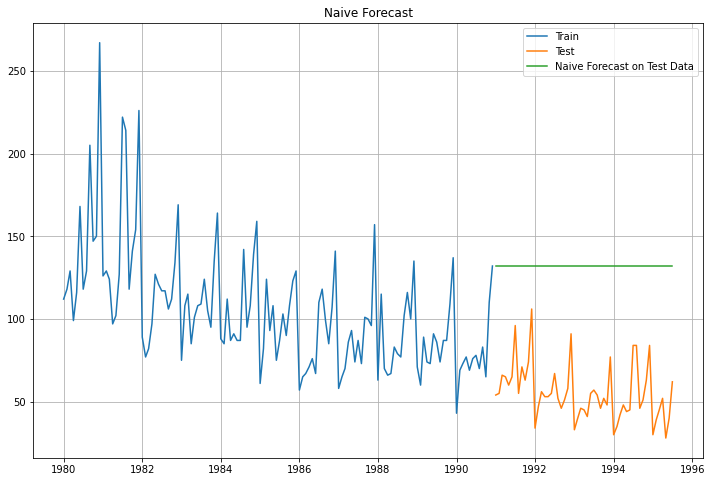

In [140]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [141]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.529


In [142]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860


In [143]:
#Simple Average

SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [144]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


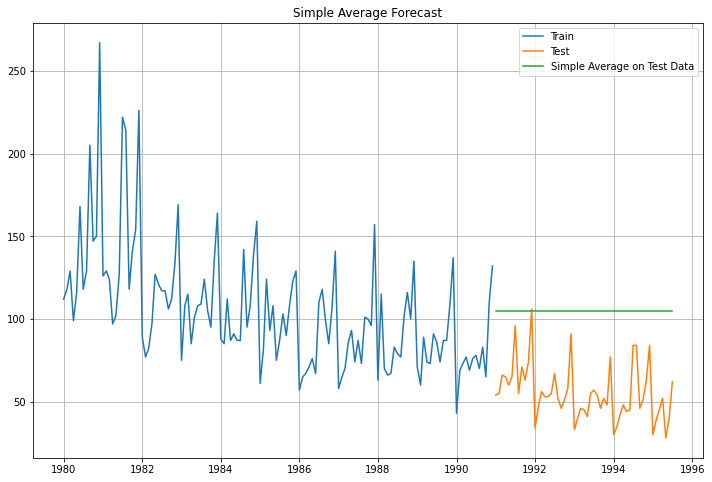

In [145]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [146]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.398


In [147]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530


In [148]:
#Moving Average(MA)
MovingAverage = df_1.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [149]:
#Trailing Moving Average
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


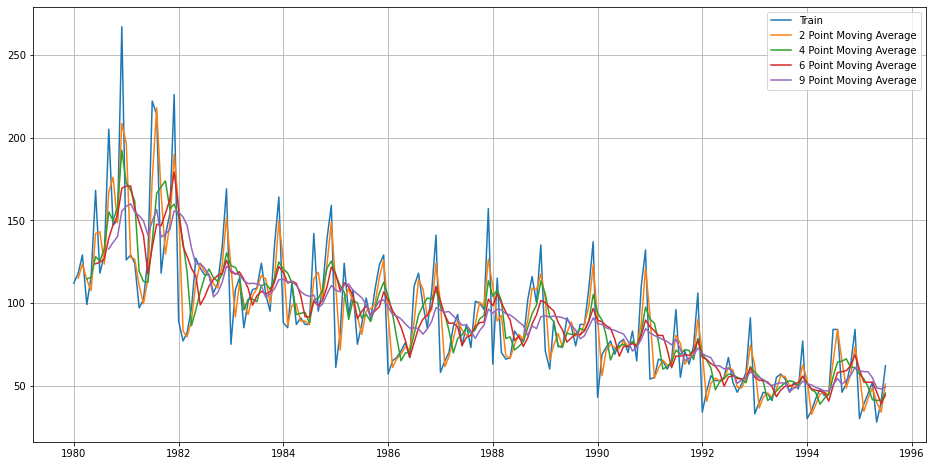

In [150]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [151]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df_1.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df_1.index.year >= 1991]


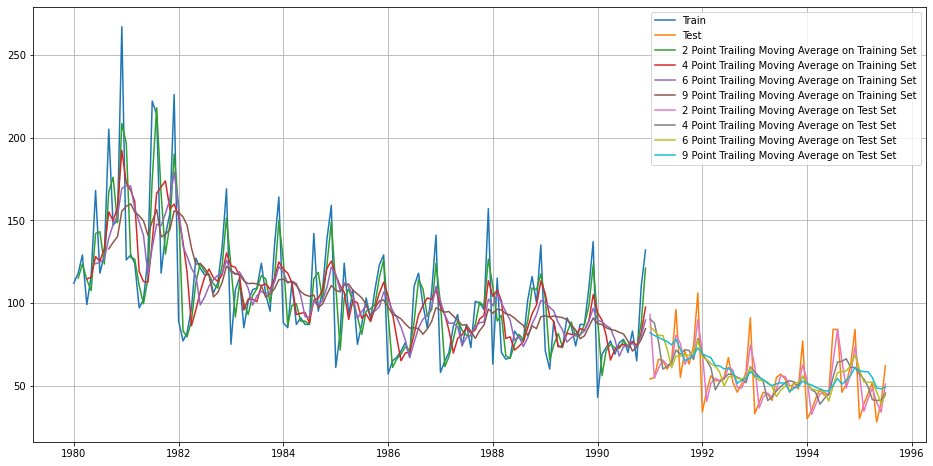

In [152]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'],label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label='9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [153]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.100
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.457
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.562
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.017 


In [154]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945


In [155]:
#Simple Exponential Smoothing
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
SES_train = train.copy()
SES_test = test.copy()
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [156]:
model_SES_autofit = model_SES.fit(optimized=True)

In [157]:
model_SES_autofit.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [158]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    87.104999
1991-02-01    87.104999
1991-03-01    87.104999
1991-04-01    87.104999
1991-05-01    87.104999
1991-06-01    87.104999
1991-07-01    87.104999
1991-08-01    87.104999
1991-09-01    87.104999
1991-10-01    87.104999
1991-11-01    87.104999
1991-12-01    87.104999
1992-01-01    87.104999
1992-02-01    87.104999
1992-03-01    87.104999
1992-04-01    87.104999
1992-05-01    87.104999
1992-06-01    87.104999
1992-07-01    87.104999
1992-08-01    87.104999
1992-09-01    87.104999
1992-10-01    87.104999
1992-11-01    87.104999
1992-12-01    87.104999
1993-01-01    87.104999
1993-02-01    87.104999
1993-03-01    87.104999
1993-04-01    87.104999
1993-05-01    87.104999
1993-06-01    87.104999
1993-07-01    87.104999
1993-08-01    87.104999
1993-09-01    87.104999
1993-10-01    87.104999
1993-11-01    87.104999
1993-12-01    87.104999
1994-01-01    87.104999
1994-02-01    87.104999
1994-03-01    87.104999
1994-04-01    87.104999
1994-05-01    87.104999
1994-06-01    87

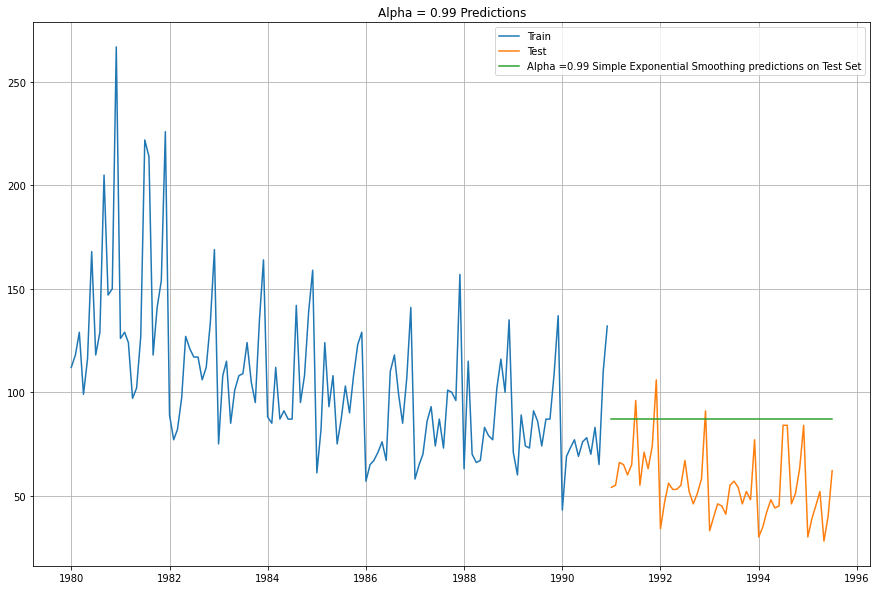

In [159]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [160]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [161]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 35.93561497109474
SES RMSE (calculated using statsmodels): 35.93561497109474


In [162]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf



,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945
"Alpha=0.99,SES",35.935615


In [163]:
#Double Exponential Smoothing
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)



==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [164]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01     86.863579
1991-02-01     88.028056
1991-03-01     89.192534
1991-04-01     90.357011
1991-05-01     91.521488
1991-06-01     92.685966
1991-07-01     93.850443
1991-08-01     95.014921
1991-09-01     96.179398
1991-10-01     97.343876
1991-11-01     98.508353
1991-12-01     99.672831
1992-01-01    100.837308
1992-02-01    102.001785
1992-03-01    103.166263
1992-04-01    104.330740
1992-05-01    105.495218
1992-06-01    106.659695
1992-07-01    107.824173
1992-08-01    108.988650
1992-09-01    110.153127
1992-10-01    111.317605
1992-11-01    112.482082
1992-12-01    113.646560
1993-01-01    114.811037
1993-02-01    115.975515
1993-03-01    117.139992
1993-04-01    118.304469
1993-05-01    119.468947
1993-06-01    120.633424
1993-07-01    121.797902
1993-08-01    122.962379
1993-09-01    124.126857
1993-10-01    125.291334
1993-11-01    126.455811
1993-12-01    127.620289
1994-01-01    128.784766
1994-02-01    129.949244
1994-03-01    131.113721
1994-04-01    132.278199


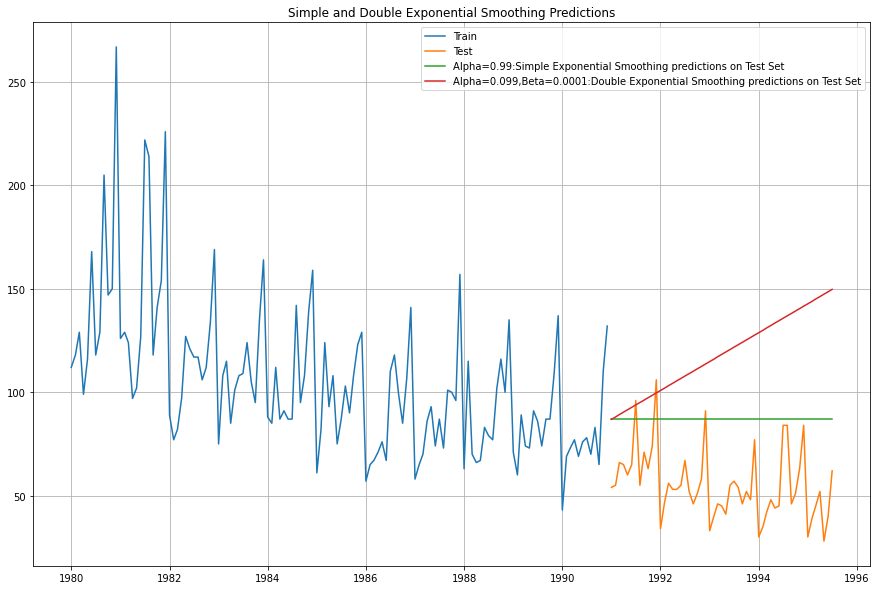

In [165]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [166]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 69.13744419374783


In [167]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945
"Alpha=0.99,SES",35.935615
"Alpha=1,Beta=0.0189:DES",69.137444


In [168]:
#Holt Winter's linear method
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.13348630377578782, 'smoothing_slope': 0.01378547758953572, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.38705525396102, 'initial_slope': 0.0, 'initial_seasons': array([ 38.68373526,  51.01808923,  58.99079973,  48.32588272,
        57.11739113,  62.54333192,  72.42693931,  78.50000507,
        74.47678085,  72.54335784,  90.61426088, 132.86448887]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [169]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     44.130870
1991-02-01     56.069843
1991-03-01     63.647173
1991-04-01     52.586876
1991-05-01     60.983004
1991-06-01     66.013564
1991-07-01     75.501791
1991-08-01     81.179476
1991-09-01     76.760872
1991-10-01     74.432068
1991-11-01     92.107591
1991-12-01    133.962439
1992-01-01     39.386305
1992-02-01     51.325278
1992-03-01     58.902608
1992-04-01     47.842311
1992-05-01     56.238439
1992-06-01     61.268999
1992-07-01     70.757226
1992-08-01     76.434912
1992-09-01     72.016307
1992-10-01     69.687504
1992-11-01     87.363026
1992-12-01    129.217874
1993-01-01     34.641740
1993-02-01     46.580713
1993-03-01     54.158043
1993-04-01     43.097746
1993-05-01     51.493874
1993-06-01     56.524434
1993-07-01     66.012661
1993-08-01     71.690347
1993-09-01     67.271742
1993-10-01     64.942939
1993-11-01     82.618461
1993-12-01    124.473309
1994-01-01     29.897175
1994-02-01     41.836148
1994-03-01     49.413478
1994-04-01     38.353181


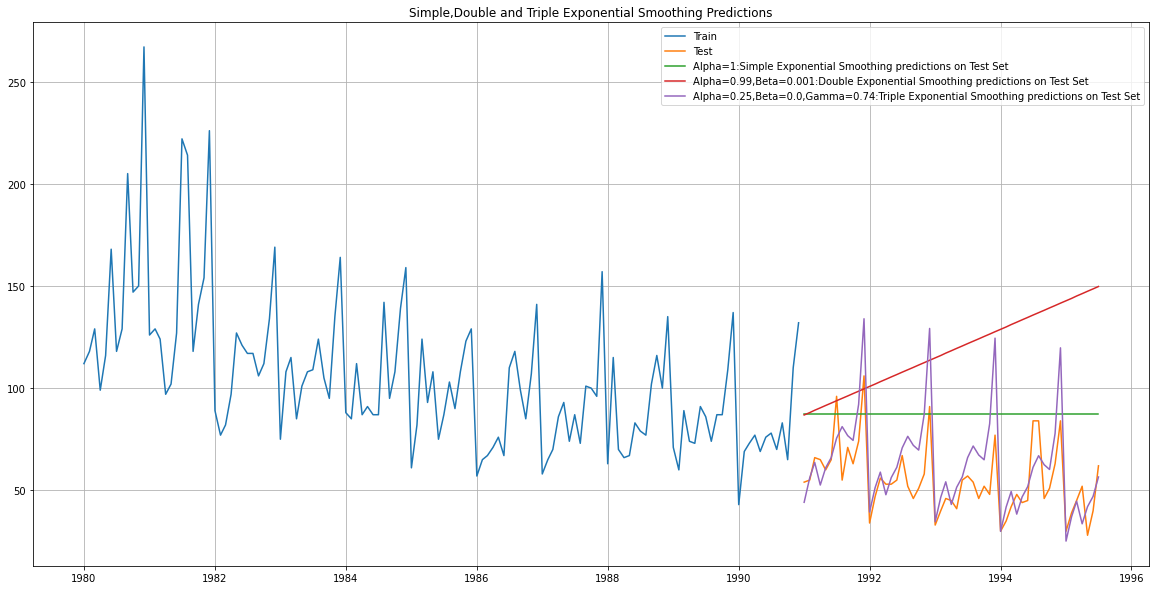

In [170]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(20,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [171]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 16.503123697357243


In [172]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945
"Alpha=0.99,SES",35.935615
"Alpha=1,Beta=0.0189:DES",69.137444
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.503124


In [173]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10609628211044227, 'smoothing_slope': 0.04843853483296353, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.65565233828687, 'initial_slope': 0.0, 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
       1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
       2.40927327, 3.30448211]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [174]:

# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01     56.674334
1991-02-01     63.471272
1991-03-01     68.788792
1991-04-01     60.277823
1991-05-01     67.180378
1991-06-01     72.461079
1991-07-01     79.292413
1991-08-01     83.989692
1991-09-01     78.640182
1991-10-01     76.982915
1991-11-01     88.741360
1991-12-01    121.193714
1992-01-01     53.882208
1992-02-01     60.331396
1992-03-01     65.371776
1992-04-01     57.271135
1992-05-01     63.815399
1992-06-01     68.816384
1992-07-01     75.287323
1992-08-01     79.729408
1992-09-01     74.634314
1992-10-01     73.044750
1992-11-01     84.182240
1992-12-01    114.940570
1993-01-01     51.090082
1993-02-01     57.191520
1993-03-01     61.954760
1993-04-01     54.264446
1993-05-01     60.450421
1993-06-01     65.171688
1993-07-01     71.282233
1993-08-01     75.469125
1993-09-01     70.628445
1993-10-01     69.106584
1993-11-01     79.623119
1993-12-01    108.687427
1994-01-01     48.297955
1994-02-01     54.051644
1994-03-01     58.537743
1994-04-01     51.257758


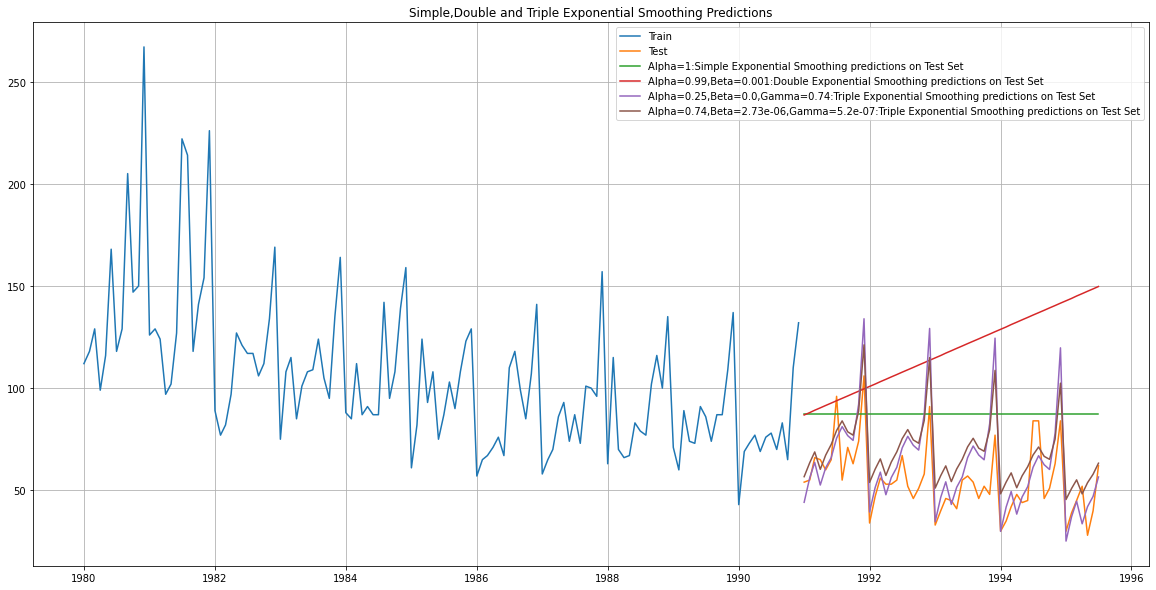

In [175]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(20,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [176]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 17.004161835281607


In [177]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945
"Alpha=0.99,SES",35.935615
"Alpha=1,Beta=0.0189:DES",69.137444
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.503124


5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [178]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

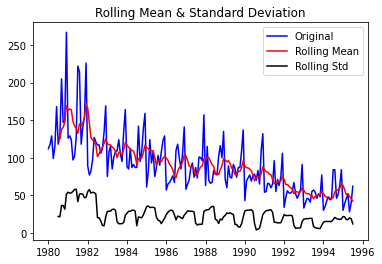

Results of Dickey-Fuller Test:
Test Statistic                  -1.932406
p-value                          0.316973
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [179]:
test_stationarity(df_1['Rose'])

We see that at 5% significant level the Time Series is Stationary.

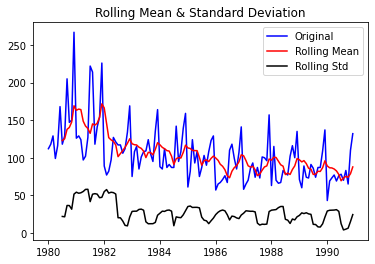

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [180]:
test_stationarity(train['Rose'])

We see that the series is Stationary at $\alpha$ = 0.05.

6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria(AIC) on the training data and evaluate this model on the test data using RMSE.

In [181]:
# combination of different parameters of p and q in the range of 0 and 2
# kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [182]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [183]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353724115532
ARIMA(1, 1, 0) - AIC:1319.3483105803125
ARIMA(1, 1, 1) - AIC:1277.7757493733707
ARIMA(1, 1, 2) - AIC:1277.3592229395217
ARIMA(2, 1, 0) - AIC:1300.609261174427
ARIMA(2, 1, 1) - AIC:1279.0456894093113
ARIMA(2, 1, 2) - AIC:1279.298693936556


In [184]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835372
5,"(1, 1, 2)",1277.359223
4,"(1, 1, 1)",1277.775749
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [185]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Tue, 23 Feb 2021   AIC                           1276.835
Time:                        03:09:06   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [186]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [102]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

16.788308088842303


In [187]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945
"Alpha=0.99,SES",35.935615
"Alpha=1,Beta=0.0189:DES",69.137444
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.503124


7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

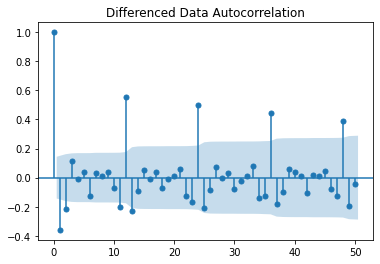

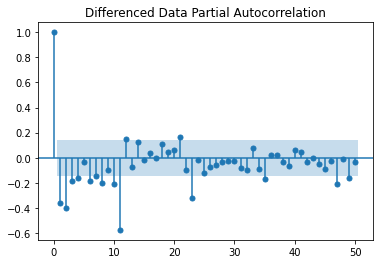

In [188]:
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [189]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.576
Method:                           css   S.D. of innovations             38.931
Date:                Tue, 23 Feb 2021   AIC                           1335.153
Time:                        03:09:33   BIC                           1340.903
Sample:                    02-01-1980   HQIC                          1337.489
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1527      3.401      0.045      0.964      -6.514       6.819


In [190]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [191]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

82.89431892499049


In [192]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945
"Alpha=0.99,SES",35.935615
"Alpha=1,Beta=0.0189:DES",69.137444
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.503124


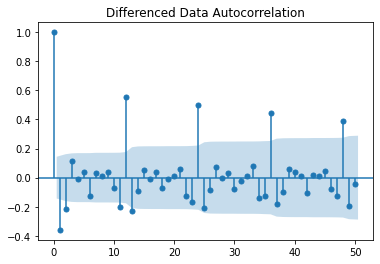

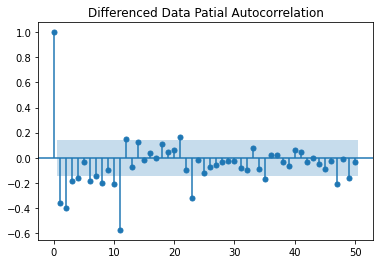

In [193]:
#SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

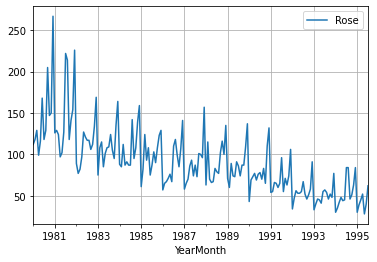

In [194]:
df_1.plot()
plt.grid();

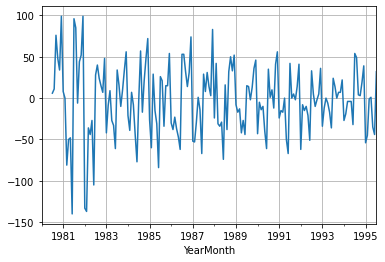

In [195]:
(df_1['Rose'].diff(6)).plot()
plt.grid();

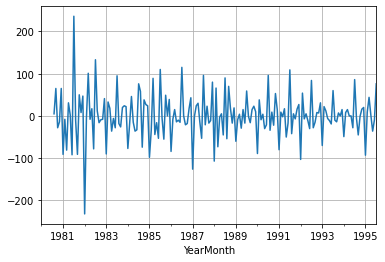

In [196]:
(df_1['Rose'].diff(6)).diff().plot()
plt.grid();

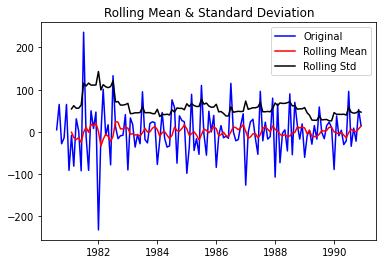

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [197]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

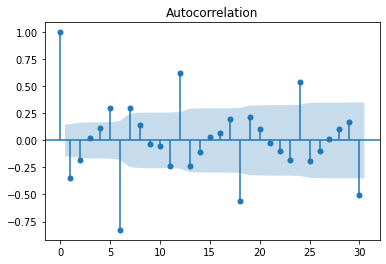

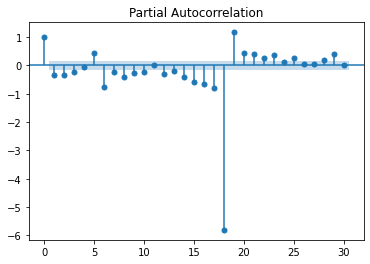

In [198]:
#Checking the ACF and the PACF plots for the new modified Time Series.

plot_acf((df_1['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_1['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [199]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -478.459
Date:                                   Tue, 23 Feb 2021   AIC                            966.918
Time:                                           03:11:20   BIC                            980.235
Sample:                                                0   HQIC                           972.315
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.8507      0.039    -22.083      0.000    

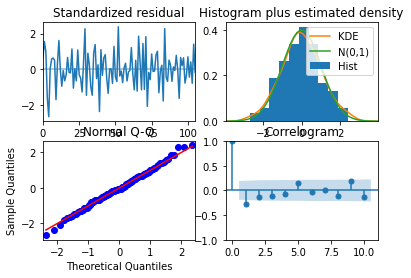

In [200]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [201]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [202]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,65.934116,21.599921,23.599048,108.269183
1,83.524407,30.540960,23.665225,143.383588
2,84.347310,37.402458,11.039839,157.654780
3,82.355794,43.187238,-2.289636,167.001225
4,81.764592,48.283860,-12.870035,176.399219


In [203]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

37.24383186553265


In [204]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945
"Alpha=0.99,SES",35.935615
"Alpha=1,Beta=0.0189:DES",69.137444
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.503124


9.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [205]:
resultsDf

,Test RMSE
RegressionOnTime,16.380281
NaiveModel,78.528860
SimpleAverageModel,52.397530
2pointTrailingMovingAverage,12.099587
4pointTrailingMovingAverage,15.456795
6pointTrailingMovingAverage,15.561640
9pointTrailingMovingAverage,16.016945
"Alpha=0.99,SES",35.935615
"Alpha=1,Beta=0.0189:DES",69.137444
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.503124


10.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [206]:
#Building the most optimum model on the Full Data.

full_data_model = sm.tsa.statespace.SARIMAX(df_1['Rose'],
                                order=(0,1,0),
                                seasonal_order=(1,1,3,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                      Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -707.876
Date:                                   Tue, 23 Feb 2021   AIC                           1425.751
Time:                                           03:11:57   BIC                           1441.158
Sample:                                       01-01-1980   HQIC                          1432.007
                                            - 07-01-1995                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.8955      0.023    -39.542      0.000    

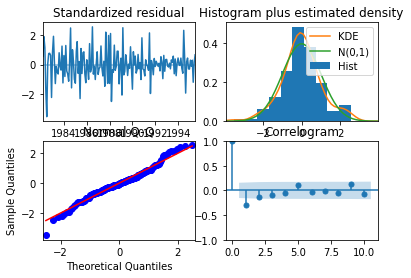

In [207]:
results_full_data_model.plot_diagnostics();

In [208]:
#Evaluate the model on the whole and predict 12 months into the future
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [209]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31', freq='M'))

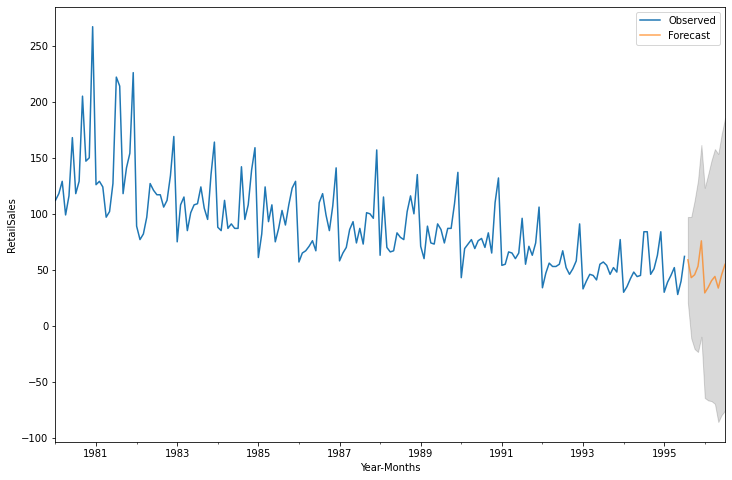

In [210]:
# plot the forecast along with the confidence band
plt.figure(figsize=((12,8)))
axis = df_1['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()